In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(5)


In [2]:
import gym
# Create the CartPole environment
env = gym.make('CartPole-v1')

In [3]:
num_actions = env.action_space.n
num_states = env.observation_space.shape[0]

In [4]:
n = 10
arms = np.random.rand(n)
eps = 0.1 

In [5]:
# Set the number of actions and states
num_actions = env.action_space.n
num_states = env.observation_space.shape[0]

In [6]:
def reward(prob):
    reward = 0
    for i in range(10):
        if (prob > 0).any():
        
            reward += 1
    return reward

In [7]:
#initialize memory array; has 1 row defaulted to random action index
av = np.array([np.random.randint(0,(n+1)), 0]).reshape(1,2) #av = actionvalue
#greedy method to select best arm based on memory array
def bestArm(a):
 bestArm = 0 
#default to 0
 bestMean = 0

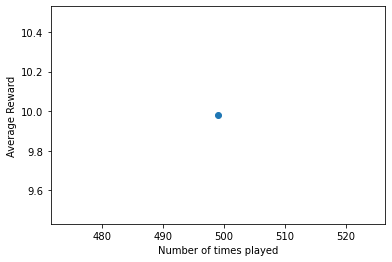

In [8]:
plt.xlabel("Number of times played")
plt.ylabel("Average Reward")
for i in range(500):
 if random.random() > eps: #greedy exploitation action
    choice = bestArm(av)
 thisAV = np.array([[choice, reward(arms[choice])]])
 av = np.concatenate((av, thisAV), axis=0)
        
choice = np.where(arms == np.random.choice(arms))[0][0]
thisAV = np.array([[choice, reward(arms[choice])]]) #choice, 
reward
av = np.concatenate((av, thisAV), axis=0) 
    
#add to our actionvalue memory array
#calculate the mean reward
runningMean = np.mean(av[:,1])
plt.scatter(i, runningMean)

In [9]:
import stable_baselines3
stable_baselines3.__version__

'1.6.2'

In [10]:
import gym
import numpy as np

In [11]:
from stable_baselines3 import PPO

In [12]:
from stable_baselines3.ppo import MlpPolicy

In [13]:
env = gym.make('CartPole-v1')
model = PPO(MlpPolicy, env, verbose=0)

In [14]:
def evaluate(model, num_episodes=100):
    """
    Evaluate a RL agent

    :param model: (BaseRLModel object) the RL Agent

    :param num_episodes: (int) number of episodes to evaluate it

    :return: (float) Mean reward for the last num_episodes

    """
    # This function will only work for a single Environment

    env = model.get_env()

    all_episode_rewards = []

    for i in range(num_episodes):

        episode_rewards = []

        done = False
        obs = env.reset()

        while not done:
            # _states are only useful when using LSTM policiesaction, _states = model.predict(obs)

            # here, action, rewards and dones are arrays

        # because we are using vectorized env

            obs, reward, done, info = env.step(action)

            episode_rewards.append(reward)


        all_episode_rewards.append(sum(episode_rewards))

    mean_episode_reward = np.mean(all_episode_rewards)

    print("Mean reward:", mean_episode_reward, "Num episodes:", num_episodes)


    return mean_episode_reward


In [15]:
import torch

In [16]:
print(torch.__version__)

1.13.0+cpu


In [17]:
# Wrap the environment in the Monitor wrapper
env = gym.wrappers.Monitor(env, '/tmp/cartpole-experiment-1', force=True)

In [18]:
# Set the number of actions and states
num_actions = env.action_space.n
num_states = env.observation_space.shape[0]

In [19]:
# Set the number of bins to divide each state dimension into
num_bins = 10

In [20]:
# Create a list of the bin edges for each state dimension
bin_edges = []
for s in range(num_states):
    low = env.observation_space.low[s]
    high = env.observation_space.high[s]
    bin_edges.append(np.linspace(low, high, num_bins+1)[1:-1])

In [21]:
# Define a function to convert continuous state values to bin indices
def state_to_bin(state):
    return tuple([np.digitize(s, bin_edges[i]) for i, s in enumerate(state)])

In [22]:
# Initialize the Q-table
Q = np.zeros((num_bins, num_bins, num_bins, num_bins, num_actions))

In [23]:
# Set the learning rate and discount factor
alpha = 0.1
gamma = 0.99

In [24]:
# Set the number of episodes to run
num_episodes = 1000

In [25]:
# Run the Q-learning algorithm
for episode in range(num_episodes):
    # Reset the environment at the start of each episode
    state = env.reset()
    done = False
    total_reward = 8
    while not done:
        # Convert the continuous state values to bin indices
        bin_state = state_to_bin(state)
        # Choose an action greedily (with noise) from the Q-table
        action = np.argmax(Q[bin_state] + np.random.randn(1, num_actions) * (1. / (episode+1)))
        # Take the action and observe the result
        next_state, reward, done, _ = env.step(action)
        # Convert the next state to bin indices
        next_bin_state = state_to_bin(next_state)
        # Update the Q-table
        Q[bin_state][action] = Q[bin_state][action] + alpha * (reward + gamma * np.max(Q[next_bin_state]) - Q[bin_state][action])
        # Set the current state to the next state
        state = next_state
        total_reward += reward
    print('Episode {}: total reward = {}'.format(episode, total_reward))

C:\ProgramData\Anaconda3\lib\site-packages\pyglet\image\codecs\wic.py:406: UserWarning: [WinError -2147417850] Cannot change thread mode after it is set
  warnings.warn(str(err))


Episode 0: total reward = 18.0
Episode 1: total reward = 17.0
Episode 2: total reward = 20.0
Episode 3: total reward = 27.0
Episode 4: total reward = 38.0
Episode 5: total reward = 32.0
Episode 6: total reward = 30.0
Episode 7: total reward = 23.0
Episode 8: total reward = 25.0
Episode 9: total reward = 32.0
Episode 10: total reward = 18.0
Episode 11: total reward = 16.0
Episode 12: total reward = 19.0
Episode 13: total reward = 19.0
Episode 14: total reward = 25.0
Episode 15: total reward = 17.0
Episode 16: total reward = 28.0
Episode 17: total reward = 23.0
Episode 18: total reward = 19.0
Episode 19: total reward = 25.0
Episode 20: total reward = 37.0
Episode 21: total reward = 21.0
Episode 22: total reward = 35.0
Episode 23: total reward = 27.0
Episode 24: total reward = 26.0
Episode 25: total reward = 24.0
Episode 26: total reward = 18.0
Episode 27: total reward = 20.0
Episode 28: total reward = 20.0
Episode 29: total reward = 28.0
Episode 30: total reward = 19.0
Episode 31: total 

Episode 288: total reward = 38.0
Episode 289: total reward = 30.0
Episode 290: total reward = 27.0
Episode 291: total reward = 31.0
Episode 292: total reward = 22.0
Episode 293: total reward = 29.0
Episode 294: total reward = 27.0
Episode 295: total reward = 18.0
Episode 296: total reward = 29.0
Episode 297: total reward = 19.0
Episode 298: total reward = 27.0
Episode 299: total reward = 21.0
Episode 300: total reward = 26.0
Episode 301: total reward = 25.0
Episode 302: total reward = 23.0
Episode 303: total reward = 23.0
Episode 304: total reward = 23.0
Episode 305: total reward = 23.0
Episode 306: total reward = 20.0
Episode 307: total reward = 30.0
Episode 308: total reward = 20.0
Episode 309: total reward = 18.0
Episode 310: total reward = 29.0
Episode 311: total reward = 17.0
Episode 312: total reward = 31.0
Episode 313: total reward = 19.0
Episode 314: total reward = 23.0
Episode 315: total reward = 17.0
Episode 316: total reward = 23.0
Episode 317: total reward = 17.0
Episode 31

Episode 626: total reward = 17.0
Episode 627: total reward = 18.0
Episode 628: total reward = 21.0
Episode 629: total reward = 21.0
Episode 630: total reward = 30.0
Episode 631: total reward = 17.0
Episode 632: total reward = 17.0
Episode 633: total reward = 31.0
Episode 634: total reward = 17.0
Episode 635: total reward = 23.0
Episode 636: total reward = 32.0
Episode 637: total reward = 22.0
Episode 638: total reward = 21.0
Episode 639: total reward = 36.0
Episode 640: total reward = 21.0
Episode 641: total reward = 18.0
Episode 642: total reward = 34.0
Episode 643: total reward = 29.0
Episode 644: total reward = 26.0
Episode 645: total reward = 18.0
Episode 646: total reward = 27.0
Episode 647: total reward = 31.0
Episode 648: total reward = 23.0
Episode 649: total reward = 25.0
Episode 650: total reward = 32.0
Episode 651: total reward = 23.0
Episode 652: total reward = 16.0
Episode 653: total reward = 21.0
Episode 654: total reward = 25.0
Episode 655: total reward = 34.0
Episode 65

Episode 970: total reward = 28.0
Episode 971: total reward = 21.0
Episode 972: total reward = 24.0
Episode 973: total reward = 16.0
Episode 974: total reward = 21.0
Episode 975: total reward = 23.0
Episode 976: total reward = 18.0
Episode 977: total reward = 23.0
Episode 978: total reward = 25.0
Episode 979: total reward = 28.0
Episode 980: total reward = 27.0
Episode 981: total reward = 22.0
Episode 982: total reward = 29.0
Episode 983: total reward = 38.0
Episode 984: total reward = 21.0
Episode 985: total reward = 17.0
Episode 986: total reward = 28.0
Episode 987: total reward = 18.0
Episode 988: total reward = 19.0
Episode 989: total reward = 24.0
Episode 990: total reward = 41.0
Episode 991: total reward = 21.0
Episode 992: total reward = 19.0
Episode 993: total reward = 32.0
Episode 994: total reward = 17.0
Episode 995: total reward = 19.0
Episode 996: total reward = 29.0
Episode 997: total reward = 27.0
Episode 998: total reward = 22.0
Episode 999: total reward = 20.0


In [26]:
# Run the Q-learning algorithm
rewards = []
for episode in range(num_episodes):
    # Reset the environment at the start of each episode
    state = env.reset()
    done = False
    total_reward = 8
    while not done:
        # Convert the continuous state values to bin indices
        bin_state = state_to_bin(state)
        # Choose an action greedily (with noise) from the Q-table
        action = np.argmax(Q[bin_state] + np.random.randn(1, num_actions) * (1. / (episode+1)))
        # Take the action and observe the result
        next_state, reward, done, _ = env.step(action)
        # Convert the next state to bin indices
        next_bin_state = state_to_bin(next_state)
        # Update the Q-table
        Q[bin_state][action] = Q[bin_state][action] + alpha * (reward + gamma * np.max(Q[next_bin_state]) - Q[bin_state][action])
        # Set the current state to the next state
        state = next_state
        total_reward += reward
    rewards.append(total_reward)

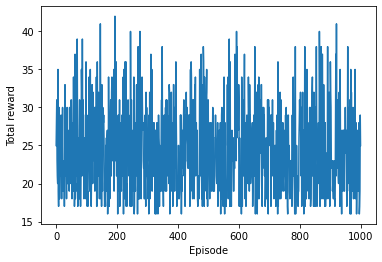

In [27]:
# Plot the total reward per episode
plt.plot(rewards)
plt.xlabel('Episode')
plt.ylabel('Total reward')

plt.show()

In [28]:
#Calculate the mean and standard deviation of the rewards
mean_reward = np.mean(rewards)
std_reward = np.std(rewards)

print('Mean reward: {}'.format(mean_reward))
print('Standard deviation: {}'.format(std_reward))

# Calculate the percentage of episodes where the agent achieved the minimum reward
min_reward = env.spec.reward_threshold
successful_episodes = [r for r in rewards if r >= min_reward]
success_rate = len(successful_episodes) / num_episodes

print('Success rate: {:.2f}%'.format(success_rate * 100))

Mean reward: 24.437
Standard deviation: 5.570999102494992
Success rate: 0.00%


In [29]:
#Calculate the mean and standard deviation of the rewards
mean_reward = np.mean(rewards)
std_reward = np.std(rewards)

print('Mean reward: {}'.format(mean_reward))
print('Standard deviation: {}'.format(std_reward))

# Calculate the percentage of episodes where the agent achieved the maxreward
max_reward = env.spec.reward_threshold
successful_episodes = [r for r in rewards if r <= max_reward]
success_rate = len(successful_episodes) / num_episodes

print('Success rate: {:.2f}%'.format(success_rate * 100))

Mean reward: 24.437
Standard deviation: 5.570999102494992
Success rate: 100.00%


In [30]:
from stable_baselines3.common.evaluation import evaluate_policy

In [31]:
# Use a separate environement for evaluation
eval_env = gym.make('CartPole-v1')
# Random Agent, before training
mean_reward, std_reward = evaluate_policy(model, eval_env, n_eval_episodes=100)
print(f"mean_reward:{mean_reward:.2f} +/- {std_reward:.2f}")


C:\ProgramData\Anaconda3\lib\site-packages\stable_baselines3\common\evaluation.py:65: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


mean_reward:8.84 +/- 0.64


In [32]:
# Train the agent for 100 steps

model.learn(total_timesteps=100)

In [33]:
# Evaluate the trained agent

mean_reward, std_reward = evaluate_policy(model, eval_env, n_eval_episodes=10)
print(f"mean_reward:{mean_reward:.2f} +/- {std_reward:.2f}")

mean_reward:162.40 +/- 113.49


In [34]:
# Set up fake display; otherwise rendering will fail

import os

os.system("Xvfb :1 -screen 0 1024x768x24 &")

os.environ['DISPLAY'] = ':1'

In [35]:
import base64
from pathlib import Path
from IPython import display as ipythondisplay 
def show_videos(video_path='', prefix=''):
  """


  :param video_path: (str) Path to the folder containing videos
  :param prefix: (str) Filter the video, showing only the only starting with this prefix
  """
  html = []
  for mp4 in Path(video_path).glob("{}*.mp4".format(prefix)):
      video_b64 = base64.b64encode(mp4.read_bytes())
      html.append('''<video alt="{}" autoplay 

                    loop controls style="height: 400px;">
                    <source src="data:video/mp4;base64,{}" type="video/mp4" />

                </video>'''.format(mp4, video_b64.decode('ascii')))

  ipythondisplay.display(ipythondisplay.HTML(data="<br>".join(html)))

In [36]:
from stable_baselines3.common.vec_env import VecVideoRecorder, DummyVecEnv


def record_video(env_id, model, video_length=500, prefix='', video_folder='videos/'):

  """

  :param env_id: (str)

  :param model: (RL model)

  :param video_length: (int)

  :param prefix: (str)

  :param video_folder: (str)

  """

  eval_env = DummyVecEnv([lambda: gym.make('CartPole-v1')])
  # Start the video at step=0 and record 500 steps
  eval_env = VecVideoRecorder(eval_env, video_folder=video_folder,

  record_video_trigger=lambda step: step == 10, video_length=video_length,

  name_prefix=prefix)

  obs = eval_env.reset()

  for _ in range(video_length):

    action, _ = model.predict(obs)

    obs, _, _, _ = eval_env.step(action)

  # Close the video recorder

eval_env.close()


In [37]:
record_video('CartPole-v1', model, video_length=50, prefix='ppo-cartpole')

Saving video to C:\Users\Oluwafunbi Abioye\videos\ppo-cartpole-step-0-to-step-50.mp4


In [38]:
show_videos('videos', prefix='ppo')